# Waze Project



In [3]:
# Libraries

# Packages for numerics + dataframes
import pandas as pd
import numpy as np

# Packages for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# This lets us see all of the columns, preventing Juptyer from redacting them.
pd.set_option('display.max_columns', None)

# Packages for statistics
from scipy import stats

# Packages for Logistic Regression & Confusion Matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, precision_score, \
recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve, auc, \
RocCurveDisplay, PrecisionRecallDisplay

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# This is the function that helps plot feature importance 
from xgboost import plot_importance
from sklearn.linear_model import LogisticRegression

# Part 1: Inspect and analyze data

In [6]:
# Loading dataset into dataframe

df = pd.read_csv('waze_dataset.csv')

In [8]:
df.head(10)

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android
5,5,retained,113,103,279.544437,2637,0,0,901.238699,439.101397,15,11,iPhone
6,6,retained,3,2,236.725314,360,185,18,5249.172828,726.577205,28,23,iPhone
7,7,retained,39,35,176.072845,2999,0,0,7892.052468,2466.981741,22,20,iPhone
8,8,retained,57,46,183.532018,424,0,26,2651.709764,1594.342984,25,20,Android
9,9,churned,84,68,244.802115,2997,72,0,6043.460295,2341.838528,7,3,iPhone


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB


In [12]:
# Isolating rows with null values

null_df = df[df['label'].isnull()]

# Displaying summary stats of rows with null values

null_df.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,7405.584286,80.837143,67.798571,198.483348,1709.295714,118.717143,30.371429,3935.967029,1795.123358,15.382857,12.125714
std,4306.900234,79.987440,65.271926,140.561715,1005.306562,156.308140,46.306984,2443.107121,1419.242246,8.772714,7.626373
min,77.000000,0.000000,0.000000,5.582648,16.000000,0.000000,0.000000,290.119811,66.588493,0.000000,0.000000
25%,3744.500000,23.000000,20.000000,94.056340,869.000000,4.000000,0.000000,2119.344818,779.009271,8.000000,6.000000
50%,7443.000000,56.000000,47.500000,177.255925,1650.500000,62.500000,10.000000,3421.156721,1414.966279,15.000000,12.000000
75%,11007.000000,112.250000,94.000000,266.058022,2508.750000,169.250000,43.000000,5166.097373,2443.955404,23.000000,18.000000
max,14993.000000,556.000000,445.000000,1076.879741,3498.000000,1096.000000,352.000000,15135.391280,9746.253023,31.000000,30.000000


In [14]:
# Isolating rows without null values

not_null_df = df[~df['label'].isnull()]

# Displaying summary stats of rows without null values

not_null_df.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000
mean,7503.573117,80.623820,67.255822,189.547409,1751.822505,121.747395,29.638296,4044.401535,1864.199794,15.544653,12.182530
std,4331.207621,80.736502,65.947295,136.189764,1008.663834,147.713428,45.350890,2504.977970,1448.005047,9.016088,7.833835
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000
25%,3749.500000,23.000000,20.000000,90.457733,878.500000,10.000000,0.000000,2217.319909,840.181344,8.000000,5.000000
50%,7504.000000,56.000000,48.000000,158.718571,1749.000000,71.000000,9.000000,3496.545617,1479.394387,16.000000,12.000000
75%,11257.500000,111.000000,93.000000,253.540450,2627.500000,178.000000,43.000000,5299.972162,2466.928876,23.000000,19.000000
max,14998.000000,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000


In [16]:
# Getting count of null values by device

null_df['device'].value_counts()

device
iPhone     447
Android    253
Name: count, dtype: int64

In [18]:
# Calculating % of iPhone nulls and Android nulls

null_df['device'].value_counts(normalize=True)

device
iPhone     0.638571
Android    0.361429
Name: proportion, dtype: float64

In [20]:
# Calculating % of iPhone users and Android users in full dataset

df['device'].value_counts(normalize=True)

device
iPhone     0.644843
Android    0.355157
Name: proportion, dtype: float64

In [22]:
# Calculating counts of churned vs. retained

print(df['label'].value_counts())
print()
print(df['label'].value_counts(normalize=True))

label
retained    11763
churned      2536
Name: count, dtype: int64

label
retained    0.822645
churned     0.177355
Name: proportion, dtype: float64


In [24]:
# Calculating median values of all columns for churned and retained users

df.groupby('label').median(numeric_only=True)

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
label,,,,,,,,,,,
churned,7477.5,59.0,50.0,164.339042,1321.0,84.5,11.0,3652.655666,1607.183785,8.0,6.0
retained,7509.0,56.0,47.0,157.586756,1843.0,68.0,9.0,3464.684614,1458.046141,17.0,14.0


In [26]:
# Grouping data by `label` and calculate the medians

medians_by_label = df.groupby('label').median(numeric_only=True)
print('Median kilometers per drive:')
# Divide the median distance by median number of drives
medians_by_label['driven_km_drives'] / medians_by_label['drives']

Median kilometers per drive:


label
churned     73.053113
retained    73.716694
dtype: float64

In [28]:
# Dividing the median distance by median number of driving days

print('Median kilometers per driving day:')
medians_by_label['driven_km_drives'] / medians_by_label['driving_days']

Median kilometers per driving day:


label
churned     608.775944
retained    247.477472
dtype: float64

In [30]:
# Dividing the median number of drives by median number of driving days

print('Median drives per driving day:')
medians_by_label['drives'] / medians_by_label['driving_days']

Median drives per driving day:


label
churned     8.333333
retained    3.357143
dtype: float64

In [32]:
# For each label, calculating the number of Android users and iPhone users

df.groupby(['label', 'device']).size()

label     device 
churned   Android     891
          iPhone     1645
retained  Android    4183
          iPhone     7580
dtype: int64

In [34]:
# For each label, calculating the percentage of Android users and iPhone users

df.groupby('label')['device'].value_counts(normalize=True)

label     device 
churned   iPhone     0.648659
          Android    0.351341
retained  iPhone     0.644393
          Android    0.355607
Name: proportion, dtype: float64

# Part 2: Exploratory Data Analysis

Text(0.5, 1.0, 'sessions box plot')

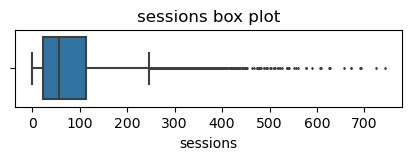

In [37]:
# Sessions: The number of occurrence of a user opening the app during the month
# Box plot

plt.figure(figsize=(5,1))
sns.boxplot(x=df['sessions'], fliersize=1)
plt.title('sessions box plot')

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'sessions box plot')

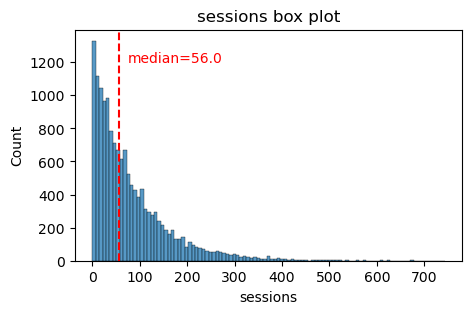

In [39]:
# Histogram

plt.figure(figsize=(5,3))
sns.histplot(x=df['sessions'])
median = df['sessions'].median()
plt.axvline(median, color='red', linestyle='--')
plt.text(75,1200, 'median=56.0', color='red')
plt.title('sessions box plot')

Text(0.5, 1.0, 'drives box plot')

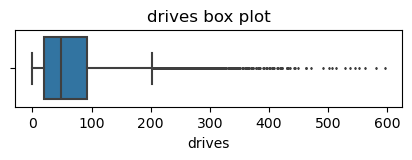

In [41]:
# Drives
# An occurrence of driving at least 1 km during the month
# Box plot

plt.figure(figsize=(5,1))
sns.boxplot(x=df['drives'], fliersize=1)
plt.title('drives box plot')

In [43]:
# Helper function to plot histograms based on the
# format of the `sessions` histogram

def histogrammer(column_str, median_text=True, **kwargs):    # **kwargs = any keyword arguments
                                                             # from the sns.histplot() function
    median=round(df[column_str].median(), 1)
    plt.figure(figsize=(5,3))
    ax = sns.histplot(x=df[column_str], **kwargs)            # Plot the histogram
    plt.axvline(median, color='red', linestyle='--')         # Plot the median line
    if median_text==True:                                    # Add median text unless set to False
        ax.text(0.25, 0.85, f'median={median}', color='red',
            ha="left", va="top", transform=ax.transAxes)
    else:
        print('Median:', median)
    plt.title(f'{column_str} histogram')

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


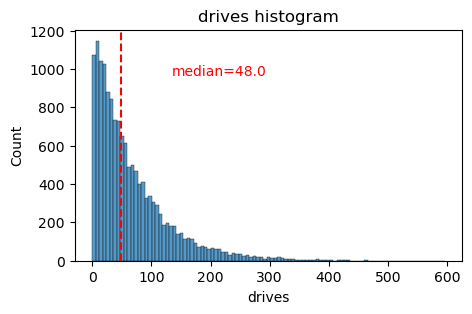

In [45]:
# Histogram

histogrammer('drives')

Text(0.5, 1.0, 'total_sessions box plot')

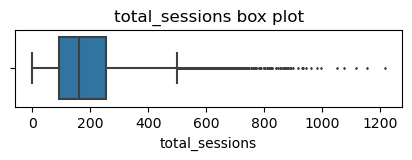

In [47]:
# total_sessions
# A model estimate of the total number of sessions since a user has onboarded
# Box plot

plt.figure(figsize=(5,1))
sns.boxplot(x=df['total_sessions'], fliersize=1)
plt.title('total_sessions box plot')

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


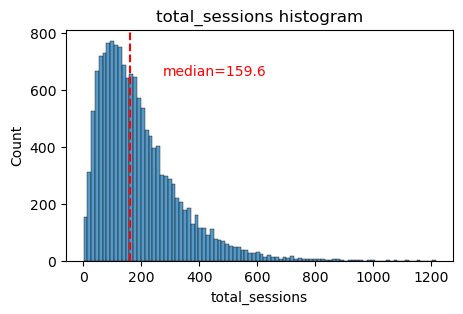

In [49]:
# Histogram

histogrammer('total_sessions')

Text(0.5, 1.0, 'n_days_after_onboarding box plot')

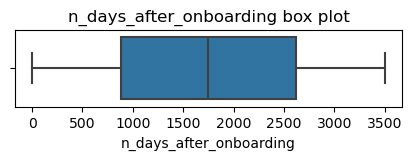

In [51]:
# n_days_after_onboarding
# The number of days since a user signed up for the app
# Box plot

plt.figure(figsize=(5,1))
sns.boxplot(x=df['n_days_after_onboarding'], fliersize=1)
plt.title('n_days_after_onboarding box plot')

Median: 1741.0


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


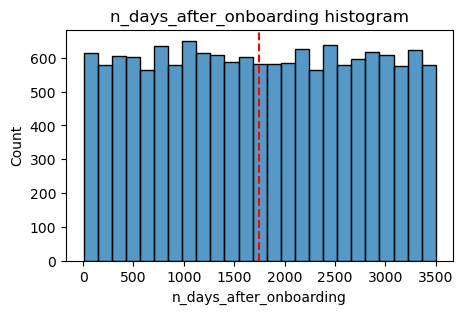

In [53]:
# Histogram

histogrammer('n_days_after_onboarding', median_text=False)

Text(0.5, 1.0, 'driven_km_drives box plot')

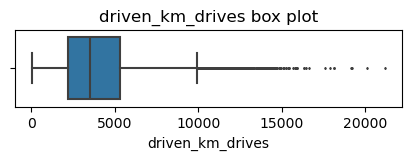

In [55]:
# driven_km_drives
# Total kilometers driven during the month
# Box plot

plt.figure(figsize=(5,1))
sns.boxplot(x=df['driven_km_drives'], fliersize=1)
plt.title('driven_km_drives box plot')

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


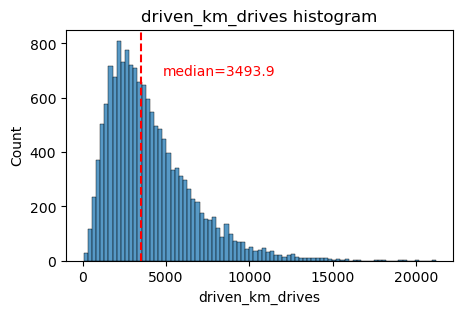

In [57]:
# Histogram

histogrammer('driven_km_drives')

Text(0.5, 1.0, 'duration_minutes_drives box plot')

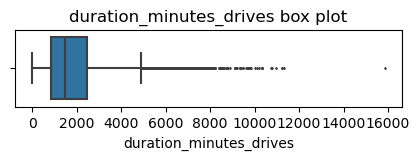

In [59]:
# duration_minutes_drives
# Total duration driven in minutes during the month
# Box plot

plt.figure(figsize=(5,1))
sns.boxplot(x=df['duration_minutes_drives'], fliersize=1)
plt.title('duration_minutes_drives box plot')

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


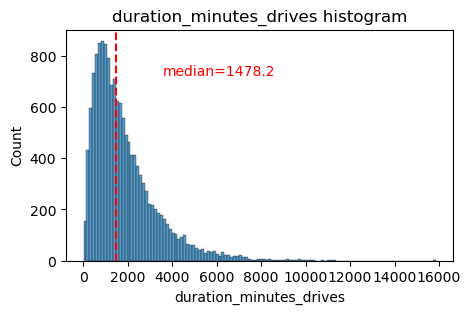

In [61]:
# Histogram

histogrammer('duration_minutes_drives')

Text(0.5, 1.0, 'activity_days box plot')

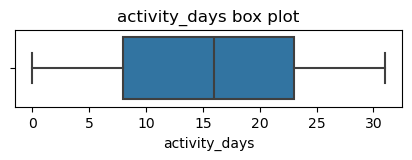

In [63]:
# activity_days
# Number of days the user opens the app during the month
# Box plot

plt.figure(figsize=(5,1))
sns.boxplot(x=df['activity_days'], fliersize=1)
plt.title('activity_days box plot')

Median: 16.0


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


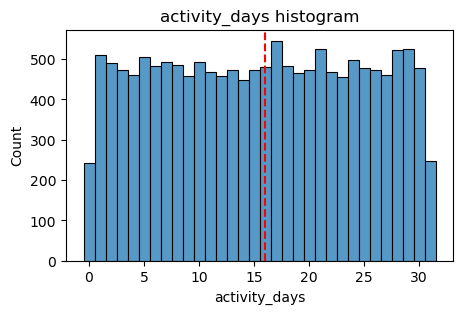

In [65]:
# Histogram

histogrammer('activity_days', median_text=False, discrete=True)

Text(0.5, 1.0, 'driving_days box plot')

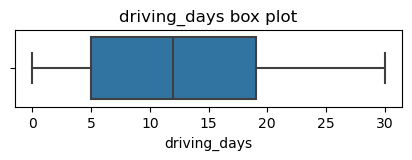

In [67]:
# driving_days
# Number of days the user drives (at least 1 km) during the month
# Box plot

plt.figure(figsize=(5,1))
sns.boxplot(x=df['driving_days'], fliersize=1)
plt.title('driving_days box plot')

Median: 12.0


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


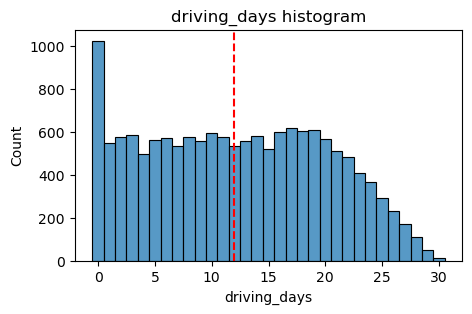

In [69]:
# Histogram

histogrammer('driving_days', median_text=False, discrete=True)

Text(0.5, 1.0, 'Users by device')

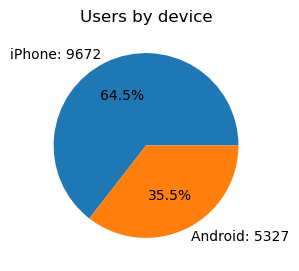

In [71]:
# device
# The type of device a user starts a session with
# Pie chart

fig = plt.figure(figsize=(3,3))
data=df['device'].value_counts()
plt.pie(data,
        labels=[f'{data.index[0]}: {data.values[0]}',
                f'{data.index[1]}: {data.values[1]}'],
        autopct='%1.1f%%'
        )
plt.title('Users by device')

In [73]:
# label
# Binary target variable (“retained” vs “churned”) for if a user has churned anytime during the course of the month
# This is also a categorical variable, and as such would not be plotted as a box plot. Plot a pie chart instead.

In [75]:
# driving_days vs. activity_days
# Because both `driving_days` and `activity_days` represent counts of days over a month and they're also closely related, you can plot them together on a single histogram. This will help to better understand how they relate to each other without having to scroll back and forth comparing histograms in two different places.

Text(0.5, 1.0, 'driving_days vs. activity_days')

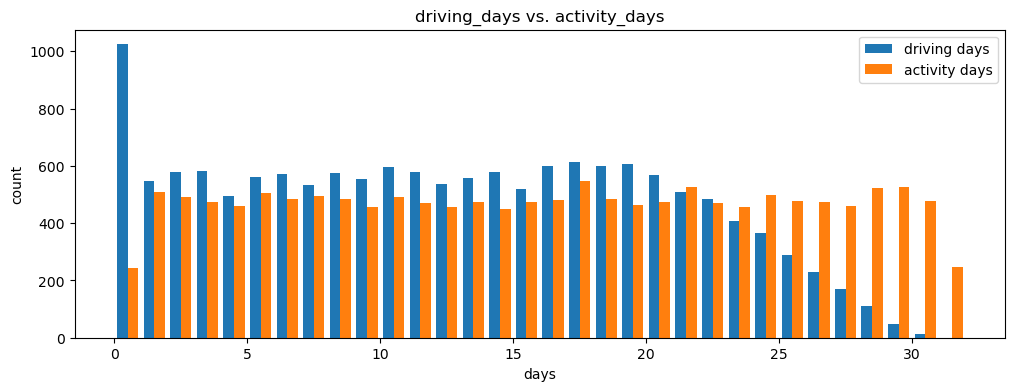

In [77]:
# Histogram

plt.figure(figsize=(12,4))
label=['driving days', 'activity days']
plt.hist([df['driving_days'], df['activity_days']],
         bins=range(0,33),
         label=label)
plt.xlabel('days')
plt.ylabel('count')
plt.legend()
plt.title('driving_days vs. activity_days')

As observed previously, this might seem counterintuitive. After all, why are there _fewer_ people who didn't use the app at all during the month and _more_ people who didn't drive at all during the month?

On the other hand, it could just be illustrative of the fact that, while these variables are related to each other, they're not the same. People probably just open the app more than they use the app to drive&mdash;perhaps to check drive times or route information, to update settings, or even just by mistake.

Nonetheless, it might be worthwile to contact the data team at Waze to get more information about this, especially because it seems that the number of days in the month is not the same between variables.

In [80]:
# Confirming the maximum number of days for each variable&mdash;`driving_days` and `activity_days`

print(df['driving_days'].max())
print(df['activity_days'].max())

30
31


It's true. Although it's possible that not a single user drove all 31 days of the month, it's highly unlikely, considering there are 15,000 people represented in the dataset.

One other way to check the validity of these variables is to plot a simple scatter plot with the x-axis representing one variable and the y-axis representing the other.

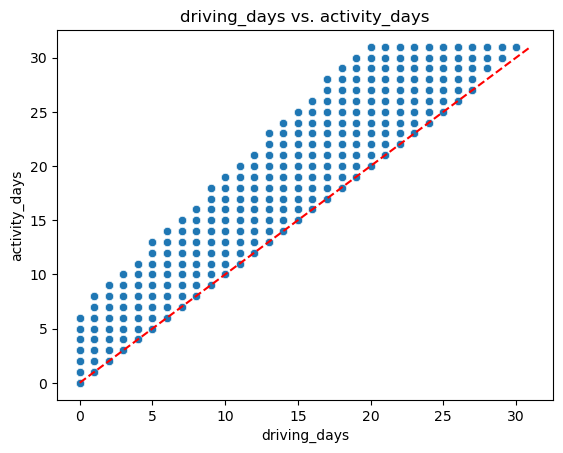

In [83]:
# Scatter plot

sns.scatterplot(data=df, x='driving_days', y='activity_days')
plt.title('driving_days vs. activity_days')
plt.plot([0,31], [0,31], color='red', linestyle='--')

We cannot have more drive-days than activity-days. None of the samples in this data violate this rule, which is good.

#### **Retention by device**

Plotting a histogram that has four bars&mdash;one for each device-label combination&mdash;to show how many iPhone users were retained/churned and how many Android users were retained/churned.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Retention by device histogram')

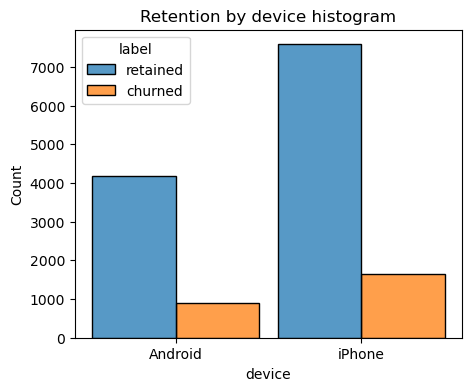

In [87]:
# Histogram

plt.figure(figsize=(5,4))
sns.histplot(data=df,
             x='device',
             hue='label',
             multiple='dodge',
             shrink=0.9
             )
plt.title('Retention by device histogram')

#### **Retention by kilometers driven per driving day**

In the previous course, you discovered that the median distance driven last month for users who churned was 8.33 km, versus 3.36 km for people who did not churn. 

1. Creating a new column in `df` called `km_per_driving_day`, which represents the mean distance driven per driving day for each user.

2. Calling the `describe()` method on the new column.

In [90]:
# 1. Creating `km_per_driving_day` column

df['km_per_driving_day'] = df['driven_km_drives'] / df['driving_days']

# 2. Calling `describe()` on the new column

df['km_per_driving_day'].describe()

count    1.499900e+04
mean              inf
std               NaN
min      3.022063e+00
25%      1.672804e+02
50%      3.231459e+02
75%      7.579257e+02
max               inf
Name: km_per_driving_day, dtype: float64

The mean value is infinity, the standard deviation is NaN, and the max value is infinity. 

This is the result of there being values of zero in the `driving_days` column. Pandas imputes a value of infinity in the corresponding rows of the new column because division by zero is undefined.

1. Converting these values from infinity to zero. You can use `np.inf` to refer to a value of infinity.

2. Calling `describe()` on the `km_per_driving_day` column to verify that it worked.

In [93]:
# 1. Converting infinite values to zero

df.loc[df['km_per_driving_day']==np.inf, 'km_per_driving_day'] = 0

# 2. Confirming that it worked

df['km_per_driving_day'].describe()

count    14999.000000
mean       578.963113
std       1030.094384
min          0.000000
25%        136.238895
50%        272.889272
75%        558.686918
max      15420.234110
Name: km_per_driving_day, dtype: float64

The maximum value is 15,420 kilometers _per drive day_. This is physically impossible. Driving 100 km/hour for 12 hours is 1,200 km. It's unlikely many people averaged more than this each day they drove, so, for now, disregard rows where the distance in this column is greater than 1,200 km.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Churn rate by mean km per driving day')

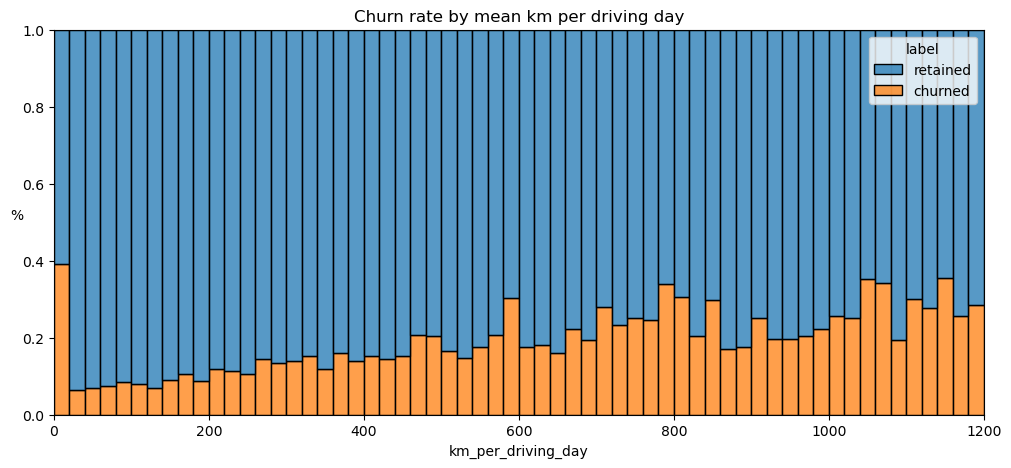

In [96]:
# Histogram

plt.figure(figsize=(12,5))
sns.histplot(data=df,
             x='km_per_driving_day',
             bins=range(0,1201,20),
             hue='label',
             multiple='fill')
plt.ylabel('%', rotation=0)
plt.title('Churn rate by mean km per driving day')

#### **Churn rate per number of driving days**

Creating another histogram just like the previous one, only this time it should represent the churn rate for each number of driving days.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Churn rate per driving day')

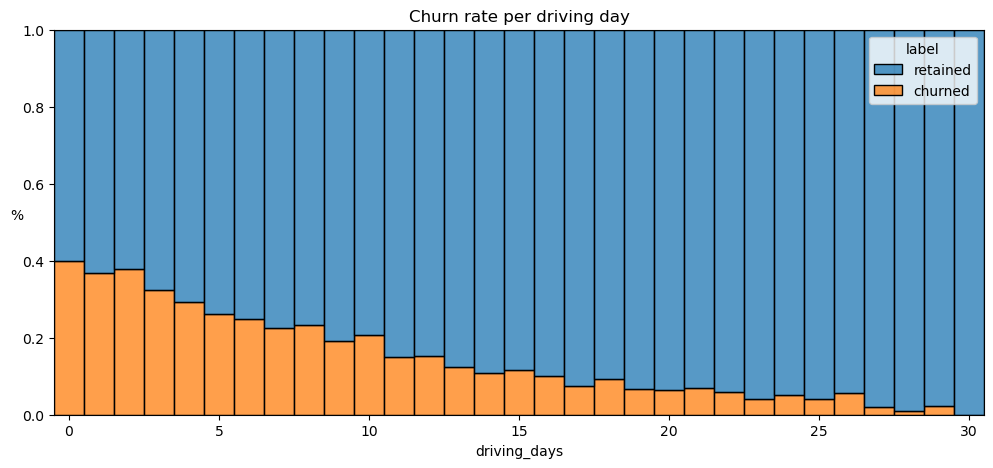

In [99]:
# Histogram

plt.figure(figsize=(12,5))
sns.histplot(data=df,
             x='driving_days',
             bins=range(1,32),
             hue='label',
             multiple='fill',
             discrete=True)
plt.ylabel('%', rotation=0)
plt.title('Churn rate per driving day')

The churn rate is highest for people who didn't use Waze much during the last month. The more times they used the app, the less likely they were to churn. While 40% of the users who didn't use the app at all last month churned, nobody who used the app 30 days churned.

#### **Proportion of sessions that occurred in the last month**

Creatingdf['percent_sessions_in_last_month'] = df['sessions'] / df['total_sessions'] a new column `percent_sessions_in_last_month` that represents the percentage of each user's total sessions that were logged in their last month of use.

In [103]:
df['percent_sessions_in_last_month'] = df['sessions'] / df['total_sessions']

In [105]:
# Median
df['percent_sessions_in_last_month'].median()

0.42309702992763176

Median: 0.4


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


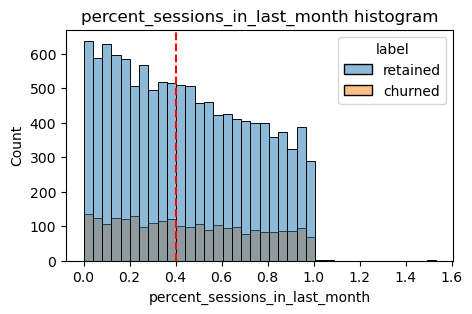

In [107]:
# Histogram

histogrammer('percent_sessions_in_last_month',
             hue=df['label'],
             multiple='layer',
             median_text=False)

In [109]:
df['n_days_after_onboarding'].median()

1741.0

Half of the people in the dataset had 40% or more of their sessions in just the last month, yet the overall median time since onboarding is almost five years.

Making a histogram of `n_days_after_onboarding` for just the people who had 40% or more of their total sessions in the last month.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


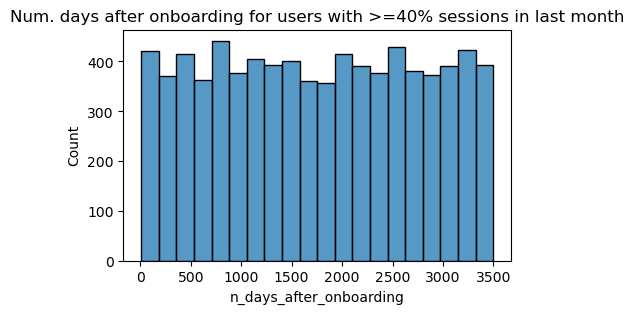

In [112]:
# Histogram

data = df.loc[df['percent_sessions_in_last_month']>=0.4]
plt.figure(figsize=(5,3))
sns.histplot(x=data['n_days_after_onboarding'])
plt.title('Num. days after onboarding for users with >=40% sessions in last month');

In [114]:
def outlier_imputer(column_name, percentile):
    # Calculate threshold
    threshold = df[column_name].quantile(percentile)
    # Impute threshold for values > than threshold
    df.loc[df[column_name] > threshold, column_name] = threshold

    print('{:>25} | percentile: {} | threshold: {}'.format(column_name, percentile, threshold))

In [116]:
for column in ['sessions', 'drives', 'total_sessions',
               'driven_km_drives', 'duration_minutes_drives']:
               outlier_imputer(column, 0.95)

                 sessions | percentile: 0.95 | threshold: 243.0
                   drives | percentile: 0.95 | threshold: 201.0
           total_sessions | percentile: 0.95 | threshold: 454.3632037399997
         driven_km_drives | percentile: 0.95 | threshold: 8889.7942356
  duration_minutes_drives | percentile: 0.95 | threshold: 4668.899348999998


In [118]:
df.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_driving_day,percent_sessions_in_last_month
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7499.000000,76.568705,64.058204,184.031320,1749.837789,121.605974,29.672512,3939.632764,1789.647426,15.537102,12.179879,578.963113,0.449255
std,4329.982679,67.297958,55.306924,118.600463,1008.513876,148.121544,45.394651,2216.041510,1222.705167,9.004655,7.824036,1030.094384,0.286919
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000,0.000000,0.000000
25%,3749.500000,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000,136.238895,0.196221
50%,7499.000000,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000,272.889272,0.423097
75%,11248.500000,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000,558.686918,0.687216
max,14998.000000,243.000000,201.000000,454.363204,3500.000000,1236.000000,415.000000,8889.794236,4668.899349,31.000000,30.000000,15420.234110,1.530637


### Comment

Analysis revealed that the overall churn rate is ~17%, and that this rate is consistent between iPhone users and Android users.

Also, EDA has revealed that users who drive very long distances on their driving days are more likely to churn, but users who drive more often are less likely to churn. The reason for this discrepancy is an opportunity for further investigation, and it would be something else to ask the Waze data team about.

In [121]:
df['monthly_drives_per_session_ratio'] = (df['drives']/df['sessions'])

In [123]:
df.head(10)

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device,km_per_driving_day,percent_sessions_in_last_month,monthly_drives_per_session_ratio
0,0,retained,243,201,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android,138.360267,0.953670,0.827160
1,1,retained,133,107,326.896596,1225,19,64,8889.794236,3160.472914,13,11,iPhone,1246.901868,0.406856,0.804511
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android,382.393602,0.841186,0.833333
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone,304.530374,0.724968,0.816327
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android,219.455667,0.499266,0.809524
5,5,retained,113,103,279.544437,2637,0,0,901.238699,439.101397,15,11,iPhone,81.930791,0.404229,0.911504
6,6,retained,3,2,236.725314,360,185,18,5249.172828,726.577205,28,23,iPhone,228.224906,0.012673,0.666667
7,7,retained,39,35,176.072845,2999,0,0,7892.052468,2466.981741,22,20,iPhone,394.602623,0.221499,0.897436
8,8,retained,57,46,183.532018,424,0,26,2651.709764,1594.342984,25,20,Android,132.585488,0.310573,0.807018
9,9,churned,84,68,244.802115,2997,72,0,6043.460295,2341.838528,7,3,iPhone,2014.486765,0.343134,0.809524


### Comment

Nearly all the variables were either very right-skewed or uniformly distributed. For the right-skewed distributions, this means that most users had values in the lower end of the range for that variable. For the uniform distributions, this means that users were generally equally likely to have values anywhere within the range for that variable.

Most of the data was not problematic, and there was no indication that any single variable was completely wrong. However, several variables had highly improbable or perhaps even impossible outlying values, such as driven_km_drives. Some of the monthly variables also might be problematic, such as activity_days and driving_days, because one has a max value of 31 while the other has a max value of 30, indicating that data collection might not have occurred in the same month for both of these variables.

Less than 18% of users churned, and ~82% were retained.

Distance driven per driving day had a positive correlation with user churn. The farther a user drove on each driving day, the more likely they were to churn. On the other hand, number of driving days had a negative correlation with churn. Users who drove more days of the last month were less likely to churn.

# Part 3: Data exploration and hypothesis testing

In [127]:
# Creating `map_dictionary`
map_dictionary = {'Android': 2, 'iPhone': 1}

# Creating new `device_type` column
df['device_type'] = df['device']

# Mapping the new column to the dictionary
df['device_type'] = df['device_type'].map(map_dictionary)

df['device_type'].head()

0    2
1    1
2    2
3    1
4    2
Name: device_type, dtype: int64

In [129]:
df.groupby('device_type')['drives'].mean()

device_type
1    64.446340
2    63.353482
Name: drives, dtype: float64

In [131]:
# Isolating the `drives` column for iPhone users.
iPhone = df[df['device_type'] == 1]['drives']

# Isolating the `drives` column for Android users.
Android = df[df['device_type'] == 2]['drives']

# Performing the t-test
stats.ttest_ind(a=iPhone, b=Android, equal_var=False)

TtestResult(statistic=1.1643714136026293, pvalue=0.24429844267242223, df=11148.669519764011)

### Comment

Since the p-value is larger than the chosen significance level (5%), we fail to reject the null hypothesis. It is concluded concluded that there is not a statistically significant difference in the average number of drives between drivers who use iPhones and drivers who use Androids.

### Comment

The key business insight is that drivers who use iPhone devices on average have a similar number of drives as those who use Androids.

One potential next step is to explore what other factors influence the variation in the number of drives, and run additonal hypothesis tests to learn more about user behavior. Further, temporary changes in marketing or user interface for the Waze app may provide more data to investigate churn.

# Part 4: Regression modeling

In [136]:
# Removing the ID column since we do not need this information for the analysis

df = df.drop('ID', axis=1)

In [138]:
# Checking the class balance of the dependent (target) variable, label

df['label'].value_counts(normalize=True)

label
retained    0.822645
churned     0.177355
Name: proportion, dtype: float64

In [140]:
df.describe()

,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_driving_day,percent_sessions_in_last_month,monthly_drives_per_session_ratio,device_type
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14894.000000,14999.000000
mean,76.568705,64.058204,184.031320,1749.837789,121.605974,29.672512,3939.632764,1789.647426,15.537102,12.179879,578.963113,0.449255,0.860566,1.355157
std,67.297958,55.306924,118.600463,1008.513876,148.121544,45.394651,2216.041510,1222.705167,9.004655,7.824036,1030.094384,0.286919,0.077298,0.478577
min,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000,136.238895,0.196221,0.805263,1.000000
50%,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000,272.889272,0.423097,0.826087,1.000000
75%,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000,558.686918,0.687216,0.900000,2.000000
max,243.000000,201.000000,454.363204,3500.000000,1236.000000,415.000000,8889.794236,4668.899349,31.000000,30.000000,15420.234110,1.530637,1.000000,2.000000


### Comment

If we compare max values with 75th percentile, we can conclude that some of these columns have outliers since max values are multiple standard deviations above the 75th percentile. 

Columns:

* `sessions`
* `drives`
* `total_sessions`
* `total_navigations_fav1`
* `total_navigations_fav2`
* `driven_km_drives`
* `duration_minutes_drives`


### Creating features

In [144]:
# Creating `km_per_driving_day` column
df['km_per_driving_day'] = df['driven_km_drives'] / df['driving_days']

# Calling `describe()` on the new column
df['km_per_driving_day'].describe()

count    1.499900e+04
mean              inf
std               NaN
min      3.022063e+00
25%      1.672804e+02
50%      3.226746e+02
75%      7.370429e+02
max               inf
Name: km_per_driving_day, dtype: float64

In [146]:
# Converting infinite values to zero
df.loc[df['km_per_driving_day']==np.inf, 'km_per_driving_day'] = 0

# Confirming that it worked
df['km_per_driving_day'].describe()

count    14999.000000
mean       564.332421
std        963.973921
min          0.000000
25%        136.238895
50%        272.889272
75%        542.953671
max       8889.794236
Name: km_per_driving_day, dtype: float64

In [148]:
# Creating `professional_driver` column
df['professional_driver'] = np.where((df['drives'] >= 60) & (df['driving_days'] >= 15), 1, 0)

In [150]:
# Checking count of professionals and non-professionals
print(df['professional_driver'].value_counts())

# Checking in-class churn rate
df.groupby(['professional_driver'])['label'].value_counts(normalize=True)

professional_driver
0    12405
1     2594
Name: count, dtype: int64


professional_driver  label   
0                    retained    0.801202
                     churned     0.198798
1                    retained    0.924437
                     churned     0.075563
Name: proportion, dtype: float64

### Comment

The churn rate for professional drivers is 7.6%, while the churn rate for non-professionals is 19.9%. This seems like it could add predictive signal to the model.

### Preparing variables

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   label                             14299 non-null  object 
 1   sessions                          14999 non-null  int64  
 2   drives                            14999 non-null  int64  
 3   total_sessions                    14999 non-null  float64
 4   n_days_after_onboarding           14999 non-null  int64  
 5   total_navigations_fav1            14999 non-null  int64  
 6   total_navigations_fav2            14999 non-null  int64  
 7   driven_km_drives                  14999 non-null  float64
 8   duration_minutes_drives           14999 non-null  float64
 9   activity_days                     14999 non-null  int64  
 10  driving_days                      14999 non-null  int64  
 11  device                            14999 non-null  object 
 12  km_p

In [156]:
# Dropping rows with missing data in `label` column
df = df.dropna(subset=['label'])

In [158]:
# Imputing outliers

for column in ['sessions', 'drives', 'total_sessions', 'total_navigations_fav1',
               'total_navigations_fav2', 'driven_km_drives', 'duration_minutes_drives']:
    threshold = df[column].quantile(0.95)
    df.loc[df[column] > threshold, column] = threshold

In [160]:
df.describe()

,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_driving_day,percent_sessions_in_last_month,monthly_drives_per_session_ratio,device_type,professional_driver
count,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14198.000000,14299.000000,14299.000000
mean,76.539688,63.964683,183.663233,1751.822505,114.562767,27.187216,3944.110515,1792.911210,15.544653,12.182530,566.943907,0.449837,0.860286,1.354850,0.173998
std,67.243178,55.127927,118.596924,1008.663834,124.378550,36.715302,2217.358063,1224.329759,9.016088,7.833835,969.897544,0.286863,0.077141,0.478485,0.379121
min,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,23.000000,20.000000,90.457733,878.500000,10.000000,0.000000,2217.319909,840.181344,8.000000,5.000000,136.168003,0.196890,0.805212,1.000000,0.000000
50%,56.000000,48.000000,158.718571,1749.000000,71.000000,9.000000,3496.545617,1479.394387,16.000000,12.000000,273.301012,0.424310,0.826087,1.000000,0.000000
75%,111.000000,93.000000,253.540450,2627.500000,178.000000,43.000000,5299.972162,2466.928876,23.000000,19.000000,543.473676,0.687251,0.900000,2.000000,0.000000
max,243.000000,200.000000,454.363204,3500.000000,422.000000,124.000000,8889.794236,4668.180092,31.000000,30.000000,8889.794236,1.530637,1.000000,2.000000,1.000000


### Encoding categorical variables

In [163]:
# Creating binary `label2` column

df['label2'] = np.where(df['label']=='churned', 1, 0)
df[['label', 'label2']].tail()

,label,label2
14994,retained,0
14995,retained,0
14996,retained,0
14997,churned,1
14998,retained,0


In [165]:
df

,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device,km_per_driving_day,percent_sessions_in_last_month,monthly_drives_per_session_ratio,device_type,professional_driver,label2
0,retained,243,200,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android,138.360267,0.953670,0.827160,2,1,0
1,retained,133,107,326.896596,1225,19,64,8889.794236,3160.472914,13,11,iPhone,808.163112,0.406856,0.804511,1,0,0
2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android,382.393602,0.841186,0.833333,2,0,0
3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone,304.530374,0.724968,0.816327,1,0,0
4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android,219.455667,0.499266,0.809524,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,retained,60,55,207.875622,140,317,0,2890.496901,2186.155708,25,17,iPhone,170.029229,0.288634,0.916667,1,0,0
14995,retained,42,35,187.670313,2505,15,10,4062.575194,1208.583193,25,20,Android,203.128760,0.223797,0.833333,2,0,0
14996,retained,243,200,422.017241,1873,17,0,3097.825028,1031.278706,18,17,iPhone,182.225002,0.646893,0.827160,1,1,0
14997,churned,149,120,180.524184,3150,45,0,4051.758549,254.187763,6,6,iPhone,675.293092,0.825374,0.805369,1,0,1


### Determining whether assumptions have been met

In [168]:
df_new = df

In [170]:
df_new = df_new.drop(columns=['device', 'label'])

In [172]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14299 entries, 0 to 14998
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   sessions                          14299 non-null  int64  
 1   drives                            14299 non-null  int64  
 2   total_sessions                    14299 non-null  float64
 3   n_days_after_onboarding           14299 non-null  int64  
 4   total_navigations_fav1            14299 non-null  int64  
 5   total_navigations_fav2            14299 non-null  int64  
 6   driven_km_drives                  14299 non-null  float64
 7   duration_minutes_drives           14299 non-null  float64
 8   activity_days                     14299 non-null  int64  
 9   driving_days                      14299 non-null  int64  
 10  km_per_driving_day                14299 non-null  float64
 11  percent_sessions_in_last_month    14299 non-null  float64
 12  monthly_d

In [174]:
df_new = df_new.rename(columns={'label2':'label', 'device_type':'device'})

In [176]:
# Collinearity
# Generating a correlation matrix

df_new.corr(method='pearson')

,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_driving_day,percent_sessions_in_last_month,monthly_drives_per_session_ratio,device,professional_driver,label
sessions,1.000000,0.996942,0.597299,0.007101,0.001858,0.008536,0.002995,-0.004545,0.025113,0.020294,-0.012541,0.614136,-0.356005,-0.012704,0.443654,0.034911
drives,0.996942,1.000000,0.595396,0.006940,0.001058,0.009505,0.003445,-0.003889,0.024357,0.019608,-0.011930,0.614282,-0.308124,-0.011684,0.444425,0.035865
total_sessions,0.597299,0.595396,1.000000,0.006615,0.000194,0.010363,0.001015,-0.000345,0.015757,0.012957,-0.015712,-0.113455,-0.205398,-0.012133,0.254532,0.024568
n_days_after_onboarding,0.007101,0.006940,0.006615,1.000000,-0.002450,-0.004968,-0.004655,-0.010167,-0.009418,-0.007321,0.011042,-0.000874,0.000995,0.011299,0.003770,-0.129263
total_navigations_fav1,0.001858,0.001058,0.000194,-0.002450,1.000000,0.002866,-0.007365,0.005646,0.010902,0.010419,0.000248,0.015180,-0.020639,0.001316,-0.000224,0.052322
total_navigations_fav2,0.008536,0.009505,0.010363,-0.004968,0.002866,1.000000,0.003567,-0.003009,-0.004425,0.002000,0.004987,0.000603,0.003043,0.000275,0.007126,0.015032
driven_km_drives,0.002995,0.003445,0.001015,-0.004655,-0.007365,0.003567,1.000000,0.690547,-0.007445,-0.009550,0.334570,-0.002088,0.000507,0.002086,-0.000901,0.019771
duration_minutes_drives,-0.004545,-0.003889,-0.000345,-0.010167,0.005646,-0.003009,0.690547,1.000000,-0.007895,-0.009425,0.233239,-0.007884,0.019937,0.007709,-0.012128,0.040407
activity_days,0.025113,0.024357,0.015757,-0.009418,0.010902,-0.004425,-0.007445,-0.007895,1.000000,0.947687,-0.414920,0.017840,-0.019597,0.010221,0.453825,-0.303851
driving_days,0.020294,0.019608,0.012957,-0.007321,0.010419,0.002000,-0.009550,-0.009425,0.947687,1.000000,-0.425030,0.013550,-0.016645,0.003859,0.469776,-0.294259


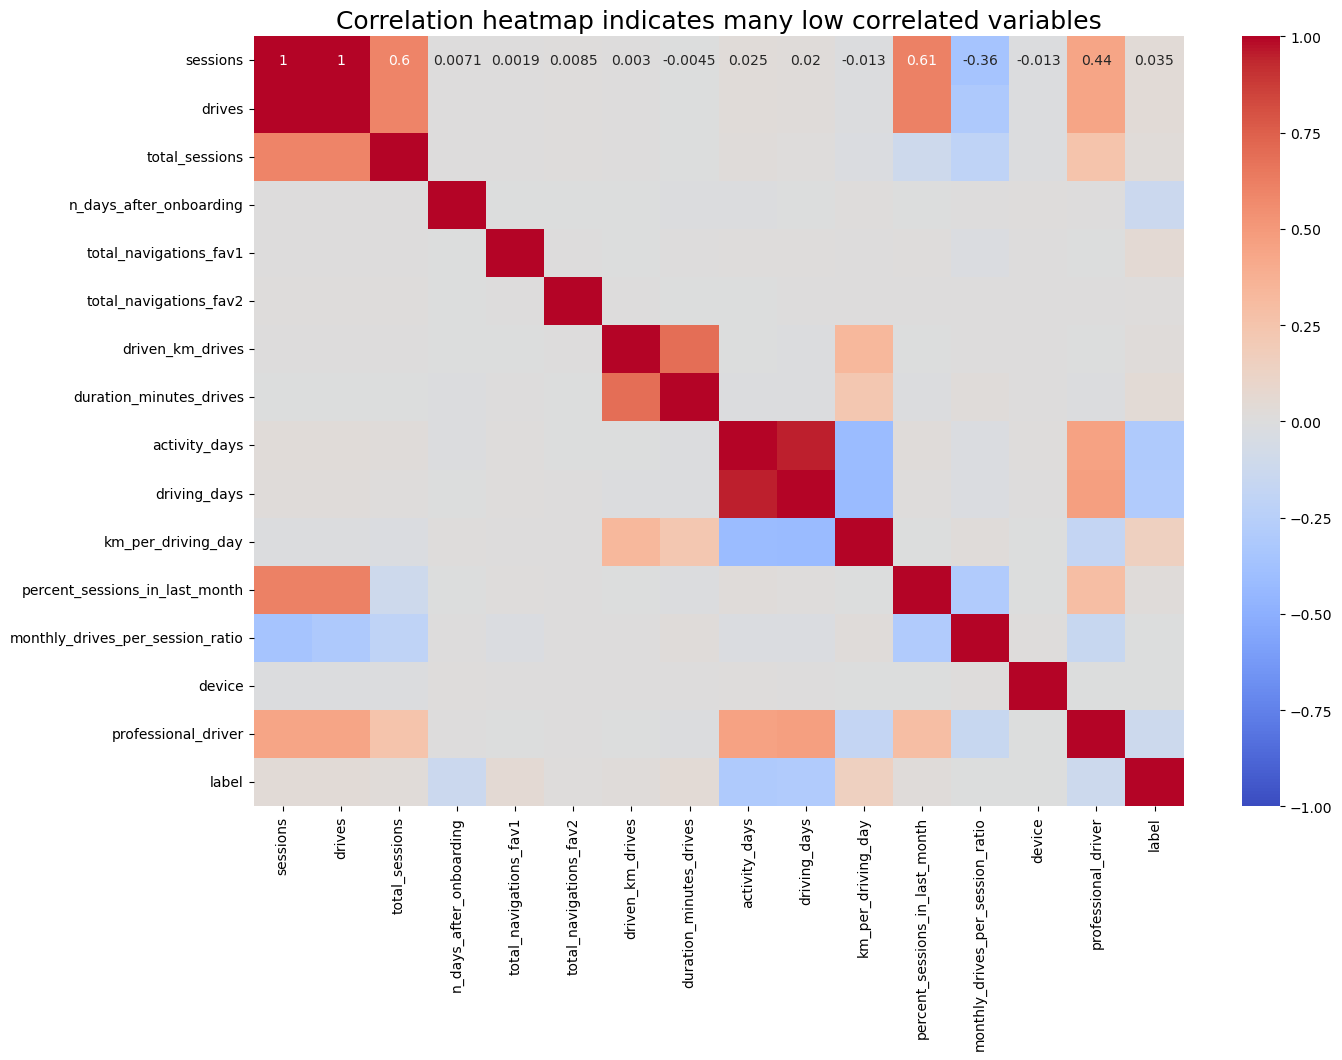

In [178]:
# Plotting correlation heatmap

plt.figure(figsize=(15,10))
sns.heatmap(df_new.corr(method='pearson'), vmin=-1, vmax=1, annot=True, cmap='coolwarm')
plt.title('Correlation heatmap indicates many low correlated variables',
          fontsize=18)
plt.show();

In [180]:
# Dummies
# # Create new `device2` variable
# df['device2'] = np.where(df['device']=='Android', 0, 1)
# df[['device', 'device2']].tail()


### Model Building

In [183]:
# Isolate predictor variables
X = df.drop(columns = ['label', 'label2', 'device', 'sessions', 'driving_days'])

In [185]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14299 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   drives                            14299 non-null  int64  
 1   total_sessions                    14299 non-null  float64
 2   n_days_after_onboarding           14299 non-null  int64  
 3   total_navigations_fav1            14299 non-null  int64  
 4   total_navigations_fav2            14299 non-null  int64  
 5   driven_km_drives                  14299 non-null  float64
 6   duration_minutes_drives           14299 non-null  float64
 7   activity_days                     14299 non-null  int64  
 8   km_per_driving_day                14299 non-null  float64
 9   percent_sessions_in_last_month    14299 non-null  float64
 10  monthly_drives_per_session_ratio  14198 non-null  float64
 11  device_type                       14299 non-null  int64  
 12  professio

In [187]:
# Isolate target variable
y = df['label2']

In [189]:
# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [191]:
# Use .head()
X_train.head()

,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,km_per_driving_day,percent_sessions_in_last_month,monthly_drives_per_session_ratio,device_type,professional_driver
152,108,186.192746,3116,243,124,8889.794236,4668.180092,24,592.652949,0.698201,0.830769,1,1
11899,2,3.487590,794,114,18,3286.545691,1780.902733,5,3286.545691,0.573462,1.000000,1,0
10937,139,347.106403,331,4,7,7400.838975,2349.305267,15,616.736581,0.492644,0.812865,2,0
669,108,454.363204,2320,11,4,6566.424830,4558.459870,18,410.401552,0.272322,0.824427,1,1
8406,10,89.475821,2478,135,0,1271.248661,938.711572,27,74.779333,0.111762,1.000000,1,0


In [193]:
# Dropping rows with missing values in X_train and y_train
X_train_clean = X_train.dropna()
y_train_clean = y_train[X_train_clean.index]

In [195]:
model = LogisticRegression(penalty='none', max_iter=400)

# Fit the model
model.fit(X_train_clean, y_train_clean)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


LogisticRegression(max_iter=400, penalty='none')

In [197]:
pd.Series(model.coef_[0], index=X.columns)

drives                              0.001867
total_sessions                      0.000330
n_days_after_onboarding            -0.000405
total_navigations_fav1              0.001256
total_navigations_fav2              0.000817
driven_km_drives                   -0.000013
duration_minutes_drives             0.000109
activity_days                      -0.106067
km_per_driving_day                  0.000017
percent_sessions_in_last_month     -0.000780
monthly_drives_per_session_ratio   -0.001520
device_type                        -0.002397
professional_driver                -0.001534
dtype: float64

In [199]:
model.intercept_

array([-0.00172973])

In [201]:
# Get the predicted probabilities of the training data
training_probabilities = model.predict_proba(X_train_clean)
training_probabilities

array([[0.93929507, 0.06070493],
       [0.61967963, 0.38032037],
       [0.76431831, 0.23568169],
       ...,
       [0.91829959, 0.08170041],
       [0.84963486, 0.15036514],
       [0.93521121, 0.06478879]])

In [203]:
# 1. Copy the `X_train` dataframe and assign to `logit_data`
logit_data = X_train_clean.copy()

# 2. Create a new `logit` column in the `logit_data` df
logit_data['logit'] = [np.log(prob[1] / prob[0]) for prob in training_probabilities]

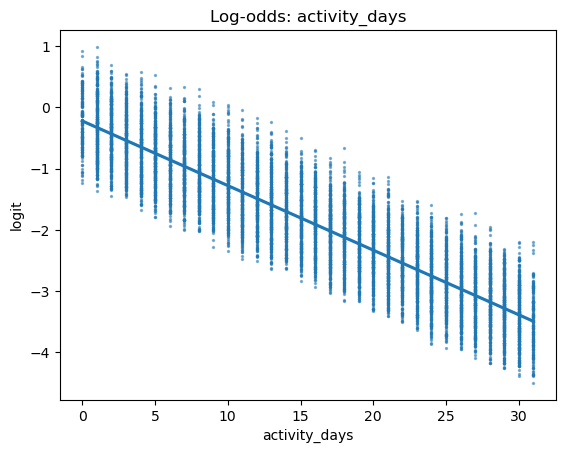

In [205]:
# Plot regplot of `activity_days` log-odds
sns.regplot(x='activity_days', y='logit', data=logit_data, scatter_kws={'s': 2, 'alpha': 0.5})
plt.title('Log-odds: activity_days');

In [207]:
# Dropping rows with missing values in X_train and y_train
X_test_clean = X_test.dropna()
y_test_clean = y_test[X_test_clean.index]

In [209]:
# Generate predictions on X_test
y_preds = model.predict(X_test_clean)

In [211]:
# Score the model (accuracy) on the test data
model.score(X_test_clean, y_test_clean)

0.8236286919831224

In [213]:
cm = confusion_matrix(y_test_clean, y_preds)

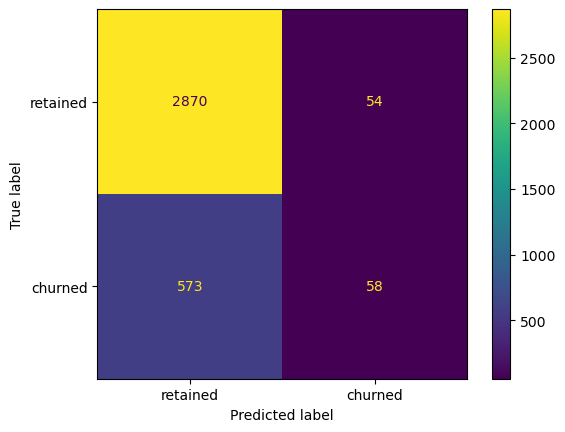

In [215]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                              display_labels=['retained', 'churned'],
                              )
disp.plot()

In [217]:
# Calculate precision manually
precision = cm[1,1] / (cm[0, 1] + cm[1, 1])
precision

0.5178571428571429

In [219]:
# Calculate recall manually
recall = cm[1,1] / (cm[1, 0] + cm[1, 1])
recall

0.0919175911251981

In [221]:
# Create a classification report
target_labels = ['retained', 'churned']
print(classification_report(y_test_clean, y_preds, target_names=target_labels))

              precision    recall  f1-score   support

    retained       0.83      0.98      0.90      2924
     churned       0.52      0.09      0.16       631

    accuracy                           0.82      3555
   macro avg       0.68      0.54      0.53      3555
weighted avg       0.78      0.82      0.77      3555



In [223]:
# Create a list of (column_name, coefficient) tuples
feature_importance = list(zip(X_train_clean.columns, model.coef_[0]))

# Sort the list by coefficient value
feature_importance = sorted(feature_importance, key=lambda x: x[1], reverse=True)
feature_importance

[('drives', 0.0018668845346432716),
 ('total_navigations_fav1', 0.0012559435444371302),
 ('total_navigations_fav2', 0.000816896519555807),
 ('total_sessions', 0.00033008548901848704),
 ('duration_minutes_drives', 0.00010942555884969264),
 ('km_per_driving_day', 1.6568824524170932e-05),
 ('driven_km_drives', -1.289674628498094e-05),
 ('n_days_after_onboarding', -0.000404875253964336),
 ('percent_sessions_in_last_month', -0.0007799578622764053),
 ('monthly_drives_per_session_ratio', -0.001520016791962907),
 ('professional_driver', -0.0015337459971873774),
 ('device_type', -0.0023974790978056873),
 ('activity_days', -0.10606691485338014)]

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


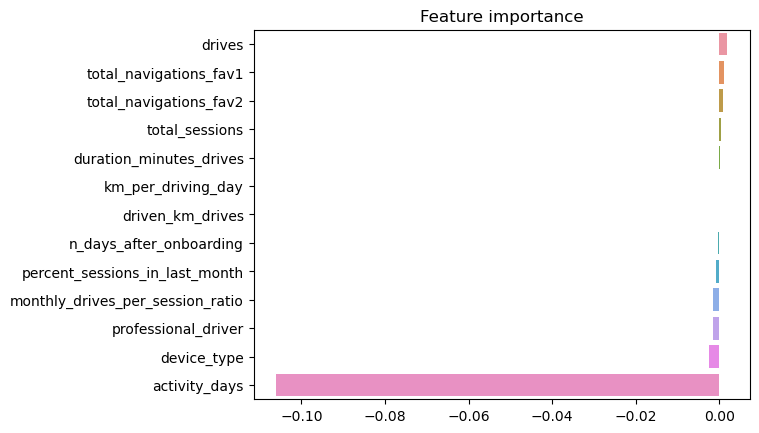

In [225]:
# Plot the feature importances
import seaborn as sns
sns.barplot(x=[x[1] for x in feature_importance],
            y=[x[0] for x in feature_importance],
            orient='h')
plt.title('Feature importance');

### Comment

The regression model revealed that `activity_days` was the most influential feature in predicting user churn, showing a negative correlation, which was expected due to its known relationship with `driving_days`. Surprisingly, `km_per_driving_day`, which had the strongest positive correlation with churn during exploratory data analysis, ended up being one of the least important variables in the model. This discrepancy likely occurred due to interactions between variables in the logistic regression model, where certain interactions diminished the expected impact of some features. The model's performance was not strong enough to recommend for making critical business decisions, as indicated by its poor recall score, but it could still guide further exploratory efforts. To improve the model, new features could be engineered, such as drive-level data or app interaction metrics, and existing features could be scaled or re-evaluated to reduce noise. Additionally, incorporating more granular user data, like geographic locations or the frequency of app engagement, could enhance the model's predictive power.


# Part 5: Building a machine learning model

In [229]:
# Import dataset
df0 = pd.read_csv('waze_dataset.csv')

In [231]:
# Inspect the first five rows
df0.head()

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android


### Feature engineering

In [234]:
# Copy the df0 dataframe
df = df0.copy()

In [236]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB


In [238]:
# 1. Create `km_per_driving_day` feature
df['km_per_driving_day'] = df['driven_km_drives'] / df['driving_days']

# 2. Get descriptive stats
df['km_per_driving_day'].describe()

count    1.499900e+04
mean              inf
std               NaN
min      3.022063e+00
25%      1.672804e+02
50%      3.231459e+02
75%      7.579257e+02
max               inf
Name: km_per_driving_day, dtype: float64

In [240]:
# 1. Convert infinite values to zero
df.loc[df['km_per_driving_day']==np.inf, 'km_per_driving_day'] = 0

# 2. Confirm that it worked
df['km_per_driving_day'].describe()

count    14999.000000
mean       578.963113
std       1030.094384
min          0.000000
25%        136.238895
50%        272.889272
75%        558.686918
max      15420.234110
Name: km_per_driving_day, dtype: float64

In [242]:
# 1. Create `percent_sessions_in_last_month` feature
df['percent_sessions_in_last_month'] = df['sessions'] / df['total_sessions']

# 2. Get descriptive stats
df['percent_sessions_in_last_month'].describe()

count    14999.000000
mean         0.449255
std          0.286919
min          0.000000
25%          0.196221
50%          0.423097
75%          0.687216
max          1.530637
Name: percent_sessions_in_last_month, dtype: float64

In [244]:
# Create `professional_driver` feature
df['professional_driver'] = np.where((df['drives'] >= 60) & (df['driving_days'] >= 15), 1, 0)

In [246]:
# Create `total_sessions_per_day` feature
df['total_sessions_per_day'] = df['total_sessions'] / df['n_days_after_onboarding']

In [248]:
# Get descriptive stats
df['total_sessions_per_day'].describe()

count    14999.000000
mean         0.338698
std          1.314333
min          0.000298
25%          0.051037
50%          0.100775
75%          0.216269
max         39.763874
Name: total_sessions_per_day, dtype: float64

In [250]:
# Create `km_per_hour` feature
df['km_per_hour'] = df['driven_km_drives'] / (df['duration_minutes_drives'] / 60)
df['km_per_hour'].describe()

count    14999.000000
mean       190.394608
std        334.674026
min         72.013095
25%         90.706222
50%        122.382022
75%        193.130119
max      23642.920871
Name: km_per_hour, dtype: float64

In [252]:
# Create `km_per_drive` feature
df['km_per_drive'] = df['driven_km_drives'] / df['drives']
df['km_per_drive'].describe()

count    1.499900e+04
mean              inf
std               NaN
min      1.008775e+00
25%      3.323065e+01
50%      7.488006e+01
75%      1.854667e+02
max               inf
Name: km_per_drive, dtype: float64

In [254]:
# 1. Convert infinite values to zero
df.loc[df['km_per_drive']==np.inf, 'km_per_drive'] = 0

# 2. Confirm that it worked
df['km_per_drive'].describe()

count    14999.000000
mean       232.817946
std        620.622351
min          0.000000
25%         32.424301
50%         72.854343
75%        179.347527
max      15777.426560
Name: km_per_drive, dtype: float64

In [256]:
# Create `percent_of_sessions_to_favorite` feature
df['percent_of_drives_to_favorite'] = (
    df['total_navigations_fav1'] + df['total_navigations_fav2']) / df['total_sessions']

# Get descriptive stats
df['percent_of_drives_to_favorite'].describe()

count    14999.000000
mean         1.665439
std          8.865666
min          0.000000
25%          0.203471
50%          0.649818
75%          1.638526
max        777.563629
Name: percent_of_drives_to_favorite, dtype: float64

In [258]:
# Drop rows with missing values
df = df.dropna(subset=['label'])

In [260]:
# Create new `device2` variable
df['device2'] = np.where(df['device']=='Android', 0, 1)
df[['device', 'device2']].tail()

,device,device2
14994,iPhone,1
14995,Android,0
14996,iPhone,1
14997,iPhone,1
14998,iPhone,1


In [262]:
# Create binary `label2` column
df['label2'] = np.where(df['label']=='churned', 1, 0)
df[['label', 'label2']].tail()

,label,label2
14994,retained,0
14995,retained,0
14996,retained,0
14997,churned,1
14998,retained,0


In [264]:
# Drop `ID` column
df = df.drop(['ID'], axis=1)

In [266]:
# Get class balance of 'label' col
df['label'].value_counts(normalize=True)

label
retained    0.822645
churned     0.177355
Name: proportion, dtype: float64

In [268]:
# 1. Isolate X variables
X = df.drop(columns=['label', 'label2', 'device'])

# 2. Isolate y variable
y = df['label2']

# 3. Split into train and test sets
X_tr, X_test, y_tr, y_test = train_test_split(X, y, stratify=y,
                                              test_size=0.2, random_state=42)

# 4. Split into train and validate sets
X_train, X_val, y_train, y_val = train_test_split(X_tr, y_tr, stratify=y_tr,
                                                  test_size=0.25, random_state=42)

In [270]:
for x in [X_train, X_val, X_test]:
    print(len(x))

8579
2860
2860


In [272]:
# 1. Instantiate the random forest classifier
rf = RandomForestClassifier(random_state=42)

# 2. Create a dictionary of hyperparameters to tune
cv_params = {'max_depth': [None],
             'max_features': [1.0],
             'max_samples': [1.0],
             'min_samples_leaf': [2],
             'min_samples_split': [2],
             'n_estimators': [300],
             }

# 3. Define a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1'}

# 4. Instantiate the GridSearchCV object
rf_cv = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='recall')

In [274]:
%%time
rf_cv.fit(X_train, y_train)

CPU times: user 1min 13s, sys: 138 ms, total: 1min 14s
Wall time: 1min 14s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None], 'max_features': [1.0],
                         'max_samples': [1.0], 'min_samples_leaf': [2],
                         'min_samples_split': [2], 'n_estimators': [300]},
             refit='recall', scoring={'accuracy', 'recall', 'f1', 'precision'})

In [276]:
# Examine best score
rf_cv.best_score_

0.12612411935350187

In [278]:
# Examine best hyperparameter combo
rf_cv.best_params_

{'max_depth': None,
 'max_features': 1.0,
 'max_samples': 1.0,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 300}

In [280]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, or accuracy

    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean 'metric' score across all validation folds.
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy',
                   }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    # Create table of results
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          },
                         )

    return table

In [282]:
results = make_results('RF cv', rf_cv, 'recall')
results

,model,precision,recall,F1,accuracy
0,RF cv,0.458184,0.126124,0.197733,0.818626


In [284]:
# 1. Instantiate the XGBoost classifier
xgb = XGBClassifier(objective='binary:logistic', random_state=42)

# 2. Create a dictionary of hyperparameters to tune
cv_params = {'max_depth': [6, 12],
             'min_child_weight': [3, 5],
             'learning_rate': [0.01, 0.1],
             'n_estimators': [300]
             }

# 3. Define a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1'}

# 4. Instantiate the GridSearchCV object
xgb_cv = GridSearchCV(xgb, cv_params, scoring=scoring, cv=4, refit='recall')

In [286]:
%%time
xgb_cv.fit(X_train, y_train)

CPU times: user 1min 33s, sys: 32.8 s, total: 2min 6s
Wall time: 16.4 s


GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [6, 12],
                         'min_child_weight': [3, 5], 'n_estimators': [300]},
             refit='recall', scoring={'accuracy', 'recall', 'f1', 'precision'})

In [288]:
# Examine best score
xgb_cv.best_score_

0.1708264263019754

In [290]:
# Examine best parameters
xgb_cv.best_params_

{'learning_rate': 0.1,
 'max_depth': 6,
 'min_child_weight': 5,
 'n_estimators': 300}

In [292]:
# Call 'make_results()' on the GridSearch object
xgb_cv_results = make_results('XGB cv', xgb_cv, 'recall')
results = pd.concat([results, xgb_cv_results], axis=0)
results

,model,precision,recall,F1,accuracy
0,RF cv,0.458184,0.126124,0.197733,0.818626
0,XGB cv,0.425932,0.170826,0.243736,0.811866


In [294]:
# Use random forest model to predict on validation data
rf_val_preds = rf_cv.best_estimator_.predict(X_val)

In [296]:
def get_test_scores(model_name:str, preds, y_test_data):
    '''
    Generate a table of test scores.

    In:
        model_name (string): Your choice: how the model will be named in the output table
        preds: numpy array of test predictions
        y_test_data: numpy array of y_test data

    Out:
        table: a pandas df of precision, recall, f1, and accuracy scores for your model
    '''
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy]
                          })

    return table

In [298]:
# Get validation scores for RF model
rf_val_scores = get_test_scores('RF val', rf_val_preds, y_val)

# Append to the results table
results = pd.concat([results, rf_val_scores], axis=0)
results

,model,precision,recall,F1,accuracy
0,RF cv,0.458184,0.126124,0.197733,0.818626
0,XGB cv,0.425932,0.170826,0.243736,0.811866
0,RF val,0.442029,0.120316,0.189147,0.817133


In [300]:
# Use XGBoost model to predict on validation data
xgb_val_preds = xgb_cv.best_estimator_.predict(X_val)

# Get validation scores for XGBoost model
xgb_val_scores = get_test_scores('XGB val', xgb_val_preds, y_val)

# Append to the results table
results = pd.concat([results, xgb_val_scores], axis=0)
results

,model,precision,recall,F1,accuracy
0,RF cv,0.458184,0.126124,0.197733,0.818626
0,XGB cv,0.425932,0.170826,0.243736,0.811866
0,RF val,0.442029,0.120316,0.189147,0.817133
0,XGB val,0.422680,0.161736,0.233951,0.812238


In [302]:
# Use XGBoost model to predict on test data
xgb_test_preds = xgb_cv.best_estimator_.predict(X_test)

# Get test scores for XGBoost model
xgb_test_scores = get_test_scores('XGB test', xgb_test_preds, y_test)

# Append to the results table
results = pd.concat([results, xgb_test_scores], axis=0)
results

,model,precision,recall,F1,accuracy
0,RF cv,0.458184,0.126124,0.197733,0.818626
0,XGB cv,0.425932,0.170826,0.243736,0.811866
0,RF val,0.442029,0.120316,0.189147,0.817133
0,XGB val,0.422680,0.161736,0.233951,0.812238
0,XGB test,0.423963,0.181460,0.254144,0.811189


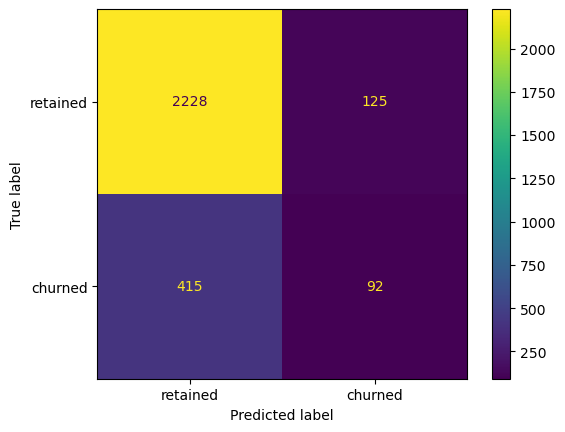

In [304]:
# Generate array of values for confusion matrix
cm = confusion_matrix(y_test, xgb_test_preds, labels=xgb_cv.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=['retained', 'churned'])
disp.plot();

### Feature importance

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

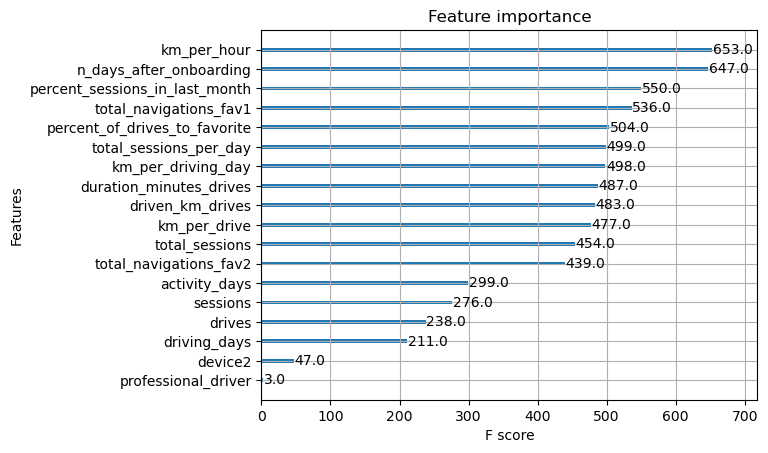

In [307]:
plot_importance(xgb_cv.best_estimator_)

Text(0.5, 1.0, 'Precision-recall curve, XGBoost model')

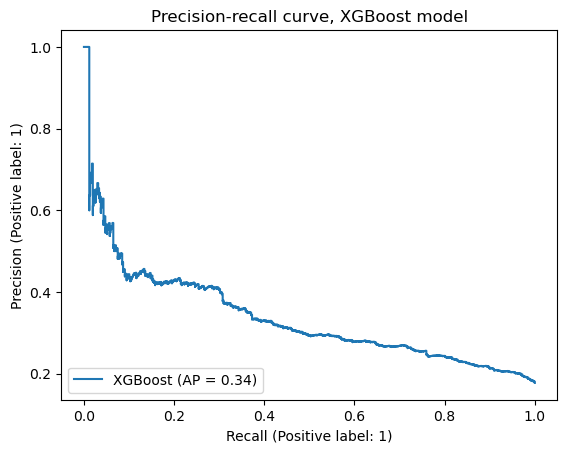

In [309]:
# Plot precision-recall curve
display = PrecisionRecallDisplay.from_estimator(
    xgb_cv.best_estimator_, X_test, y_test, name='XGBoost'
    )
plt.title('Precision-recall curve, XGBoost model')

In [311]:
# Get predicted probabilities on the test data
predicted_probabilities = xgb_cv.best_estimator_.predict_proba(X_test)
predicted_probabilities

array([[0.94572806, 0.05427192],
       [0.57626796, 0.42373204],
       [0.98132175, 0.01867823],
       ...,
       [0.8135836 , 0.18641639],
       [0.9661311 , 0.03386891],
       [0.73862785, 0.26137215]], dtype=float32)

In [313]:
# Create a list of just the second column values (probability of target)
probs = [x[1] for x in predicted_probabilities]

# Create an array of new predictions that assigns a 1 to any value >= 0.4
new_preds = np.array([1 if x >= 0.4 else 0 for x in probs])
new_preds

array([0, 1, 0, ..., 0, 0, 0])

In [315]:
# Get evaluation metrics for when the threshold is 0.4
get_test_scores('XGB, threshold = 0.4', new_preds, y_test)

,model,precision,recall,F1,accuracy
0,"XGB, threshold = 0.4",0.414986,0.284024,0.337237,0.802098


In [317]:
results

,model,precision,recall,F1,accuracy
0,RF cv,0.458184,0.126124,0.197733,0.818626
0,XGB cv,0.425932,0.170826,0.243736,0.811866
0,RF val,0.442029,0.120316,0.189147,0.817133
0,XGB val,0.422680,0.161736,0.233951,0.812238
0,XGB test,0.423963,0.181460,0.254144,0.811189


In [319]:
def threshold_finder(y_test_data, probabilities, desired_recall):
    '''
    Find the decision threshold that most closely yields a desired recall score.

    Inputs:
        y_test_data: Array of true y values
        probabilities: The results of the `predict_proba()` model method
        desired_recall: The recall that you want the model to have

    Outputs:
        threshold: The decision threshold that most closely yields the desired recall
        recall: The exact recall score associated with `threshold`
    '''
    probs = [x[1] for x in probabilities]  # Isolate second column of `probabilities`
    thresholds = np.arange(0, 1, 0.001)    # Set a grid of 1,000 thresholds to test

    scores = []
    for threshold in thresholds:
        # Create a new array of {0, 1} predictions based on new threshold
        preds = np.array([1 if x >= threshold else 0 for x in probs])
        # Calculate recall score for that threshold
        recall = recall_score(y_test_data, preds)
        # Append the threshold and its corresponding recall score as a tuple to `scores`
        scores.append((threshold, recall))

    distances = []
    for idx, score in enumerate(scores):
        # Calculate how close each actual score is to the desired score
        distance = abs(score[1] - desired_recall)
        # Append the (index#, distance) tuple to `distances`
        distances.append((idx, distance))

    # Sort `distances` by the second value in each of its tuples (least to greatest)
    sorted_distances = sorted(distances, key=lambda x: x[1], reverse=False)
    # Identify the tuple with the actual recall closest to desired recall
    best = sorted_distances[0]
    # Isolate the index of the threshold with the closest recall score
    best_idx = best[0]
    # Retrieve the threshold and actual recall score closest to desired recall
    threshold, recall = scores[best_idx]

    return threshold, recall


In [321]:
# Get the predicted probabilities from the champion model
probabilities = xgb_cv.best_estimator_.predict_proba(X_test)

# Call the function
threshold_finder(y_test, probabilities, 0.5)

(0.194, 0.4990138067061144)

In [322]:
# Create an array of new predictions that assigns a 1 to any value >= 0.124
probs = [x[1] for x in probabilities]
new_preds = np.array([1 if x >= 0.124 else 0 for x in probs])

# Get evaluation metrics for when the threshold is 0.124
get_test_scores('XGB, threshold = 0.124', new_preds, y_test)

,model,precision,recall,F1,accuracy
0,"XGB, threshold = 0.124",0.269262,0.654832,0.381609,0.623776


### Conclusion



The regression model indicated that `activity_days` was the most influential feature in predicting user churn, showing a negative correlation, which was consistent with its known relationship with `driving_days`. Unexpectedly, `km_per_driving_day`, which had the strongest positive correlation with churn during exploratory analysis, turned out to be one of the least significant variables in the model. This discrepancy was likely due to interactions between features in the logistic regression, where such interactions can diminish the expected impact of individual predictors. The model's performance, highlighted by its poor recall score, suggested it was not suitable for making critical business decisions, although it could still inform further exploratory analysis. To improve the model, new features could be engineered, existing ones scaled, or the model could be restructured by removing less predictive variables. Incorporating additional drive-level and app interaction data might also enhance the model's accuracy and insights.
